# Notebook 3: Model Inference and testing

This notebook uses the trained model to perform testing on some unseen data to inter how the model is performing and what kind of mistakes it is making.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !pip install transformers[torch]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 4.5 MB/s eta 0:00:00


In [ ]:
from transformers import AutoModelForTokenClassification
from transformers import AutoTokenizer
import torch

In [ ]:
model_save_path = '/content/drive/Shareddrives/TM_project/saved_models/model_v1'
tokenizer_save_path = '/content/drive/Shareddrives/TM_project/saved_models/tokenizer_v1'

In [ ]:
model=AutoModelForTokenClassification.from_pretrained(model_save_path)
tokenizer=AutoTokenizer.from_pretrained(tokenizer_save_path)

In [ ]:
tech_skills_sentences = [
    "Programming in languages like Python, Java, and JavaScript is essential for software development.",
    "Understanding database management with tools like SQL and MongoDB is crucial for data handling.",
    "Knowledge of web development using HTML, CSS, and frameworks like React or Angular is highly sought after.",
    "Expertise in machine learning and AI technologies can drive innovation in various sectors.",
    "Proficiency in cloud computing platforms like AWS, Azure, or Google Cloud is critical for modern IT infrastructure.",
    "Cybersecurity skills, including knowledge of encryption and network security, are vital for protecting digital assets.",
    "Mobile app development for iOS and Android platforms requires specific coding and design skills.",
    "DevOps practices, including continuous integration and deployment, are key for efficient software lifecycle management.",
    "Data analysis and visualization skills using tools like Tableau or PowerBI support informed decision-making.",
    "Familiarity with Internet of Things (IoT) technology can lead to innovative solutions in various industries."
]
soft_skills_sentences = [
    "Effective communication skills are vital for collaborating with teams and stakeholders.",
    "Strong problem-solving abilities enable tech professionals to tackle complex challenges.",
    "Adaptability in the tech industry is crucial for keeping up with rapidly evolving technologies.",
    "Leadership and team management skills are essential for guiding projects to successful completion.",
    "Critical thinking is key for analyzing and making decisions in technology-related scenarios.",
    "Time management and organization skills help in meeting project deadlines and managing multiple tasks.",
    "Creativity and innovation are important for developing unique solutions and products.",
    "Emotional intelligence aids in understanding team dynamics and building strong workplace relationships.",
    "A growth mindset encourages continuous learning and adaptation in the face of technological changes.",
    "Attention to detail ensures high-quality work and minimizes errors in complex projects."
]
spell_challenge_sentences = [
    "Programming in languages like Pythn, Java, and JS is essential for softwae development.",
    "Understanding databse management with tools like SQL and MogoDB is crucial for data handling.",
    "Knowledge of web development using HTML, CSS, and frameworks like React or Angular is highly sought after.",
    "Expertise in machine learning and AI technologies can drive innovation in various sectors.",
    "Proficiency in cloud computing platforms like AWS, Azure, or Google Cloud is critical for modern IT infrastructure.",
    "Cybersec skills, including knowledge of encryption and network security, are vital for protecting digital assets.",
    "Mobile app development for iOS and Android platforms requires specific coding and design skills.",
    "DevOps practices, including continuous integration and deployment, are key for efficient software lifecycle management.",
    "Data analysis and visualization skills using tools like Tableau or PowerBI support informed decision-making.",
    "Familiarity with Internet of Things (IoT) technology can lead to innovative solutions in various industries."
]

In [ ]:
def model_infer(sentence):
  inputs=tokenizer(sentence,return_tensors='pt')
  with torch.no_grad():
    outputs=model(**inputs)
  logits=outputs.logits
  predictions=torch.argmax(logits,dim=-1)
  labels=[model.config.id2label[label_id] for label_id in predictions[0].tolist()]
  token_predictions=list(zip(tokenizer.convert_ids_to_tokens(inputs['input_ids'][0]),labels))
  return token_predictions

# Sentence by Sentence testing

In [ ]:
tp=model_infer(tech_skills_sentences[0])
for token,label in tp:
  print(token,label)

[CLS] O
programming B
in O
languages O
like O
python B
, O
java B
, O
and O
java B
##script I
is O
essential O
for O
software B
development I
. O
[SEP] O


In [ ]:
tp=model_infer(spell_challenge_sentences[0])
for token,label in tp:
  print(token,label)

[CLS] O
programming B
in O
languages O
like O
p O
##yt O
##hn O
, O
java B
, O
and O
j B
##s I
is O
essential O
for O
soft O
##wa O
##e O
development O
. O
[SEP] I


In [ ]:
tp=model_infer(tech_skills_sentences[1])
for token,label in tp:
  print(token,label)


[CLS] O
understanding O
database B
management I
with O
tools O
like O
sql B
and O
mon B
##go I
##db I
is O
crucial O
for O
data B
handling I
. O
[SEP] I


In [ ]:
tp=model_infer(spell_challenge_sentences[1])
for token,label in tp:
  print(token,label)

[CLS] O
understanding O
data O
##bs O
##e O
management O
with O
tools O
like O
sql B
and O
mo B
##go I
##db I
is O
crucial O
for O
data B
handling I
. O
[SEP] I


In [ ]:
tp=model_infer(tech_skills_sentences[5])
for token,label in tp:
  print(token,label)

[CLS] O
cyber B
##se I
##cu I
##rity I
skills O
, O
including O
knowledge O
of O
encryption B
and O
network B
security I
, O
are O
vital O
for O
protecting O
digital O
assets O
. O
[SEP] O


In [ ]:
tp=model_infer(spell_challenge_sentences[5])
for token,label in tp:
  print(token,label)

[CLS] O
cyber B
##se I
##c O
skills O
, O
including O
knowledge O
of O
encryption B
and O
network B
security I
, O
are O
vital O
for O
protecting O
digital O
assets O
. O
[SEP] O


In [ ]:
tp=model_infer(soft_skills_sentences[6])
for token,label in tp:
  print(token,label)

[CLS] O
creativity O
and O
innovation O
are O
important O
for O
developing O
unique O
solutions O
and O
products O
. O
[SEP] I


# Inferencing Model for an entire list

For sentence by sentence text like resumes

In [ ]:
# Converting the provided text into a list of sentences using Python

text = [
"Data Scientist",
"Verizon · Basking Ridge, NJ 6 days ago · 77 applicants",
"$133,000/yr - $248,000/yr HybridMatches your job preferences, workplace type is Hybrid. Full-time Mid-Senior level",
"10,001+ employees · IT Services and IT Consulting",
"133 school alumni work here",
"See how you compare to 77 applicants. Reactivate Premium",
"Skills: Predictive Analytics, Data Analytics, +8 more",
"View verifications related to this job post.",
"Show all",
"Apply",
"Save",
"Save Data Scientist at Verizon",
"jobscan-iconSave Job",
"Scan",
"Share",
"Show more options",
"About the job",
"When you join Verizon",
"Verizon is one of the world's leading providers of technology and communications services, transforming the way we connect around the world. We're a human network that reaches across the globe and works behind the scenes. We anticipate, lead, and believe that listening is where learning begins. In crisis and in celebration, we come together-lifting up our communities and striving to make an impact to move the world forward. If you're fueled by purpose, and powered by persistence, explore a career with us. Here, you'll discover the rigor it takes to make a difference and the fulfillment that comes with living the #NetworkLife.",
"What you'll be doing...",
"We use digital data as the fuel to propel us beyond our competition. As a Data Scientist, you'll lead projects that develop and perform complex analyses using Big Data technologies. You'll be constantly on the lookout for new modeling techniques, evolving technologies, and emerging industry trends so that we can stay ahead of the game. Your work will help us meet our customers' needs and make it even easier for them to do business with us.",
"Responsibilities include:",
"Performing analyses to find actionable insights.",
"Developing the Business Plan, Commitment View, Best View, including analysis, distribution and recommendations for management reviews.",
"Preparing final monthly analyses of business trends and budget variance of financial results and Key Performance Indicators to be used in management reviews and strategic business analysis sessions.",
"Communicating with partners in a clear and concise manner.",
"Creating performance reports, including business insights, ad-hoc analysis and recommendations to executive management.",
"Collaborating with others to identify analytic requirements and devise the best possible solution.",
"Analyzing complex operational, economic and accounting data to quantify the competitive business segments and evaluate potential operational changes.",
"Defining problems, collecting data, establishing facts and drawing conclusions.",
"Developing innovative strategies and models to predict future outcomes.",
"Consulting with partners and senior leaders on insights, trends, and data-based solutions.",
"What We're Looking For...",
"With an eye towards improving performance and predictability, you like the science of analytics. Developing resolutions to complex problems, using your sharp judgment to develop methods, techniques, and evaluation criteria allows you to deliver solutions that make a huge impact. You're able to communicate technical information to non-technical audiences, and you take pride in your ability to share your considerable knowledge with your peers.",
"You'll need to have:",
"Bachelor's degree or four or more years of work experience.",
"Six or more years of relevant work experience.",
"Experience as a data scientist, analyst, or statistical modeler.",
"Experience with Microsoft Office Suite with knowledge of Excel.",
"Experience with FWA (Fixed Wireless Access) and/or FiOS products, services and related customer journeys.",
"Experience working with large sets of data, and ability to quantify impact, initiatives and risks.",
"Experience with visualization tools, like Tableau.",
"Experience developing executive-level presentations and visualizations (Google and/or Microsoft Applications).",
"Experience with statistical analysis, quantitative analysis, forecasting/predictive analytics, multivariate testing.",
"Even better if you have one or more of the following:",
"Degree in business intelligence and analytics, computer science, or mathematics.",
"Master's degree.",
"Experience in the technology and/or telecommunications industry.",
"Experience with Data Warehousing or Teradata SQL.",
"Experience with programming languages, like Java, Python, or R.",
"If Verizon and this role sound like a fit for you, we encourage you to apply even if you don't meet every 'even better' qualification listed above.",
"Where you'll be working",
"In this hybrid role, you'll have a defined work location that includes work from home and assigned office days set by your manager.",
"Scheduled Weekly Hours",
"40",
"Equal Employment Opportunity",
"We're proud to be an equal opportunity employer - and celebrate our employees' differences, including race, color, religion, sex, sexual orientation, gender identity, national origin, age, disability, and Veteran status. At Verizon, we know that diversity makes us stronger. We are committed to a collaborative, inclusive environment that encourages authenticity and fosters a sense of belonging. We strive for everyone to feel valued, connected, and empowered to reach their potential and contribute their best. Check out our diversity and inclusion page to learn more.",
"Our benefits are designed to help you move forward in your career, and in areas of your life"
]

In [ ]:
tp=model_infer(text[0])
for token,label in tp:
  print(token,label)

[CLS] O
data O
scientist O
[SEP] I


In [ ]:
def join_hashed_words(inputs):
    new_inputs = []
    for i in range(len(inputs)):
        word, tag = inputs[i]
        if word.startswith('#') and i > 0:
            prev_word, prev_tag = new_inputs.pop()
            new_word = prev_word + word.lstrip('#')
            new_tag = prev_tag
            new_inputs.append((new_word, new_tag))
        else:
            new_inputs.append((word, tag))

    return new_inputs

In [ ]:
list_of_skills=[]
current_word = ''
words = []
for row in text:
    pred_tags = model_infer(row)
    pred_tags = pred_tags[1:-1]
    pred_tags = join_hashed_words(pred_tags)


    prev_tag = ''
    for word, tag in pred_tags:
        if tag == 'B':
            current_word = word
        elif tag == 'I' and prev_tag != 'O':
            current_word = current_word + ' ' + word
        elif current_word:
            words.append(current_word)
            current_word = ''
        prev_tag = tag


In [ ]:
set(words)

{'accounting',
 'big data',
 'business analysis',
 'data analytics',
 'data warehousing',
 'digital data',
 'drawing',
 'excel',
 'executive management',
 'google',
 'impact',
 'it',
 'java',
 'mathematics',
 'microsoft applications',
 'microsoft office',
 'predictive analytics',
 'programming languages',
 'python',
 'r',
 'scan',
 'science',
 'statistical analysis',
 'tableau',
 'telecommunications',
 'teradata',
 'verizon'}

# Checking if Spelling mistakes are detected

In [ ]:
ml = [
"Seeking a data-driven professional with expertise in machine learning: The ideal candidate will possess strong skills in developing and implementing machine learning algorithms, have a knack for statistical analysis, and be adept at interpreting complex data to drive innovative solutions and improve business outcomes.",
"Seeking a data-driven professional with expertise in m.l.: The ideal candidate will possess strong skills in developing and implementing machine learning algorithms, have a knack for statistical analysis, and be adept at interpreting complex data to drive innovative solutions and improve business outcomes."
]

In [ ]:
tp=model_infer(ml[0])
for token,label in tp:
  print(token,label)

[CLS] O
seeking O
a O
data O
- O
driven O
professional O
with O
expertise O
in O
machine B
learning I
: O
the O
ideal O
candidate O
will O
possess O
strong O
skills O
in O
developing O
and O
implementing O
machine B
learning I
algorithms O
, O
have O
a O
kn O
##ack O
for O
statistical B
analysis I
, O
and O
be O
adept O
at O
interpreting O
complex O
data O
to O
drive O
innovative O
solutions O
and O
improve O
business O
outcomes O
. O
[SEP] O


In [ ]:
tp=model_infer(ml[1])
for token,label in tp:
  print(token,label)

[CLS] O
seeking O
a O
data O
- O
driven O
professional O
with O
expertise O
in O
m O
. O
l O
. O
: O
the O
ideal O
candidate O
will O
possess O
strong O
skills O
in O
developing O
and O
implementing O
machine B
learning I
algorithms O
, O
have O
a O
kn O
##ack O
for O
statistical B
analysis I
, O
and O
be O
adept O
at O
interpreting O
complex O
data O
to O
drive O
innovative O
solutions O
and O
improve O
business O
outcomes O
. O
[SEP] I


## Checking of Element exists in Master Skill List

In [ ]:
import pandas as pd
full_list=pd.read_csv("/content/drive/Shareddrives/TM_project/skill_final.csv")

In [ ]:
l=full_list['0'].to_list()

In [ ]:
'ml' in l

False

In [ ]:
"impact" in l

True

In [ ]:
'time management' in l

True

In [ ]:
'continuous learning' in l

False

In [ ]:
'syracuse' in l

False

# All other Visualizations

In [ ]:
import pandas as pd
model_results=pd.read_parquet("/content/drive/Shareddrives/TM_project/pred_results.parquet")
merged_final_df=pd.read_parquet("/content/drive/Shareddrives/TM_project/merged_data.parquet")

In [ ]:
final_merged_df = merged_final_df.merge(model_results, left_on='Job Id Simplified', right_on='Job Id')
# Selecting relevant columns and renaming 'Job Id' from df1_filtered to 'Job Id Simplified'
# merged_final_df = df1_filtered.rename(columns={'Job Id': 'Job Id Simplified'})[['Job Id Simplified', 'Job Description', 'Skills', 'Tokenized Description', 'tags', 'found_skills', 'ISNIFS', 'Job Title']]
# final_merged_df = merged_final_df.merge(model_results, left_on='Job Id Simplified', right_on='Job Id')
# final_merged_df
final_merged_df

,Job Id_x,Job Description,Skills,Tokenized Description,tags,found_skills,ISNIFS,Job Id_y,Job Id Simplified,Job Title,Job Id,Predicted Skills
0,1,overview reporting to the director of data in...,"[Java, Application Architecture, CI, Data Stru...","[[overview, reporting, director, data, integra...","[[O, O, O, B, I, O, O, O, O, O, O, O, O, O, O,...","[application development, json, sql, data anal...","[databases, software development, framework, ci]",ac0c91f394fa77a00ad72ee3440cb4b7,1,Software Engineer II,1,"[data integration, software development life c..."
1,2,research associate job locationsus-ma-cambridg...,[Advisor],"[[research, associate, job, locationsus-ma-cam...","[[O, O, O, O, O, O, O, O, O], [O, O, O, O, O, ...","[application development, facebook, cio, twitt...",[],54d9be0a01d5c48a47116f5d527154fe,2,Research Associate,2,"[curiosity, advisor, application development, ..."
2,3,schneider electric creates connected technolog...,[],"[[schneider, electric, creates, connected, tec...","[[O, O, O, O, O, O, O, O, O, O, O, O, O], [O, ...","[software house, microsoft word, project manag...",[],2092de5cc1d91311a39b1cae0fee9c09,3,Project Engineer,3,"[schneider, software services, intercom, insta..."
3,4,"working location:massachusetts, westborough;...","[Data Engineering, Schema Design, Informatica,...","[[working, location, :, massachusetts, ,, west...","[[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O,...","[data science, data engineering, methodologies...","[rdbms, scripting]",46cbd86bab6441a53dee72855dc66ac6,4,Data Engineer,4,"[linear regression, logistic regression, scien..."
4,5,job summary: the product management professio...,"[Product Requirements, Product Management, Pro...","[[job, summary, :, product, management, profes...","[[O, O, O, B, I, O, O, O, O, O, B, O, O, O, O,...","[product management, product requirements, des...",[],3502aa5ac916ad02f655f0b8525e9013,5,Product Manager,5,"[product management, product management, desig..."
...,...,...,...,...,...,...,...,...,...,...,...,...
2209,2278,auto req id 55643br job code i1358p it data ar...,"[Data Management, Data Warehouse, HTTP, Stata,...","[[auto, req, id, 55643br, job, code, i1358p, d...","[[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O,...","[data science, r, data modeling, data manageme...","[natural, python, salesforce]",7779344beec21b2ba990dce2f4a96bb4,2278,Data Scientist,2278,"[zoom, business education, data science, produ..."
2210,2279,auto req id 55553br job code i0857p it busines...,"[Information Systems, HTTP, BI Publisher, SQL,...","[[auto, req, id, 55553br, job, code, i0857p, b...","[[O, O, O, O, O, O, O, B, I, O, O, O, O, O, O,...","[critical thinking, sql, https, data analysis,...","[databases, data conversion, frameworks]",90f107385cb990ffb9a3535a73bdd046,2279,Business Systems Analyst,2279,"[technology solutions, agile, agile, critical ..."
2211,2280,auto req id 55453br job code i0758p applicatio...,"[Unix, Query Optimization, Java, Methodologies...","[[auto, req, id, 55453br, job, code, i0758p, a...","[[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O,...","[programming, debugging, data security, adviso...","[oracle, agile, http, problem solving, corona,...",39aa8aa59412afe6753354be5868c1aa,2280,Senior Software Engineer,2280,[]
2212,2281,auto req id 54782br job code f0957p financial ...,"[Financial Analysis, Accounting, Budget Analys...","[[auto, req, id, 54782br, job, code, f0957p, f...","[[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O,...","[budget management, oracle, project cost, micr...",[],9975bf695f0fe6204cbd6a726228bdd9,2281,Financial Analyst,2281,[project]


In [ ]:
grouped_data = final_merged_df.groupby('Job Title').agg({
    'Skills': lambda x: set(skill for skills_list in x for skill in skills_list if skills_list is not None),
    'found_skills': lambda x: set(skill for skills_list in x for skill in skills_list if skills_list is not None),
    'Predicted Skills': lambda x: set(skill for skills_list in x for skill in skills_list if skills_list is not None),
    'Job Title': 'count'  # Count the number of rows for each Job Title
}).rename(columns={'Job Title': 'Job_Counts'})

grouped_data

,Skills,found_skills,Predicted Skills,Job_Counts
Job Title,,,,
Associate Scientist,"{Bioprocess, Mass Spectrometry, Cell Counting,...","{bioreactor, scientists, insurance, data syste...","{bioreactor, scientists, innovative, inspectio...",45
Business Analyst,"{File Systems, Data Governance, Integration Te...","{user acceptance testing, insurance, scientist...","{user acceptance testing, insurance, cengage, ...",70
Business Development Representative,"{Sales Automation, Business Solution, Enterpri...","{insurance, competitive pricing, mavenlink, ow...","{sales systems, insurance, center, marketing s...",72
Business Systems Analyst,"{ITIL, IT Solutions, Regression Testing, OCM, ...","{user acceptance testing, scientists, insuranc...","{user acceptance testing, insurance, cycle man...",36
Data Analyst,"{Data Governance, Data Integration, Visualizat...","{insurance, scientists, ibm, process engineeri...","{insurance, nuances, marketing sales, digital ...",53
Data Engineer,"{Data Vault, Prometheus, UX, cosmos, Data Gove...","{scientists, web applications, databases, mvc,...","{scientists, itc, nuances, insurance, capital ...",70
Data Scientist,"{Data Capture, Hub, Data Integration, Visualiz...","{calibration, scientists, insurance, c #, mobi...","{calibration, insurance, scientists, idea, bio...",59
DevOps Engineer,"{File Systems, Prometheus, UX, Data Governance...","{c #, insurance, scientists, agile methodologi...","{center, scientists, insurance, ibm, bamboo, s...",42
Engineer,"{Image Segmentation, Unit Operations, MATLAB, ...","{scientists, insurance, front desk, technician...","{scientists, insurance, production support, ho...",34


In [ ]:
# Calculating the length of skills and found_skills for each job title
grouped_data['Skills Length'] = grouped_data['Skills'].apply(len)
grouped_data['Found Skills Length'] = grouped_data['found_skills'].apply(len)
grouped_data['Predicted Skills Length'] = grouped_data['Predicted Skills'].apply(len)
grouped_data['Skills Length'] = grouped_data['Skills'].apply(len)


In [ ]:
grouped_data

,Skills,found_skills,Predicted Skills,Job_Counts,Skills Length,Found Skills Length,Predicted Skills Length
Job Title,,,,,,,
Associate Scientist,"{Bioprocess, Mass Spectrometry, Cell Counting,...","{bioreactor, scientists, insurance, data syste...","{bioreactor, scientists, innovative, inspectio...",45,52,109,77
Business Analyst,"{File Systems, Data Governance, Integration Te...","{user acceptance testing, insurance, scientist...","{user acceptance testing, insurance, cengage, ...",70,204,259,156
Business Development Representative,"{Sales Automation, Business Solution, Enterpri...","{insurance, competitive pricing, mavenlink, ow...","{sales systems, insurance, center, marketing s...",72,33,158,136
Business Systems Analyst,"{ITIL, IT Solutions, Regression Testing, OCM, ...","{user acceptance testing, scientists, insuranc...","{user acceptance testing, insurance, cycle man...",36,133,193,159
Data Analyst,"{Data Governance, Data Integration, Visualizat...","{insurance, scientists, ibm, process engineeri...","{insurance, nuances, marketing sales, digital ...",53,188,239,151
Data Engineer,"{Data Vault, Prometheus, UX, cosmos, Data Gove...","{scientists, web applications, databases, mvc,...","{scientists, itc, nuances, insurance, capital ...",70,305,367,208
Data Scientist,"{Data Capture, Hub, Data Integration, Visualiz...","{calibration, scientists, insurance, c #, mobi...","{calibration, insurance, scientists, idea, bio...",59,230,288,218
DevOps Engineer,"{File Systems, Prometheus, UX, Data Governance...","{c #, insurance, scientists, agile methodologi...","{center, scientists, insurance, ibm, bamboo, s...",42,276,281,151
Engineer,"{Image Segmentation, Unit Operations, MATLAB, ...","{scientists, insurance, front desk, technician...","{scientists, insurance, production support, ho...",34,54,89,85


In [ ]:
grouped_data=grouped_data.reset_index()

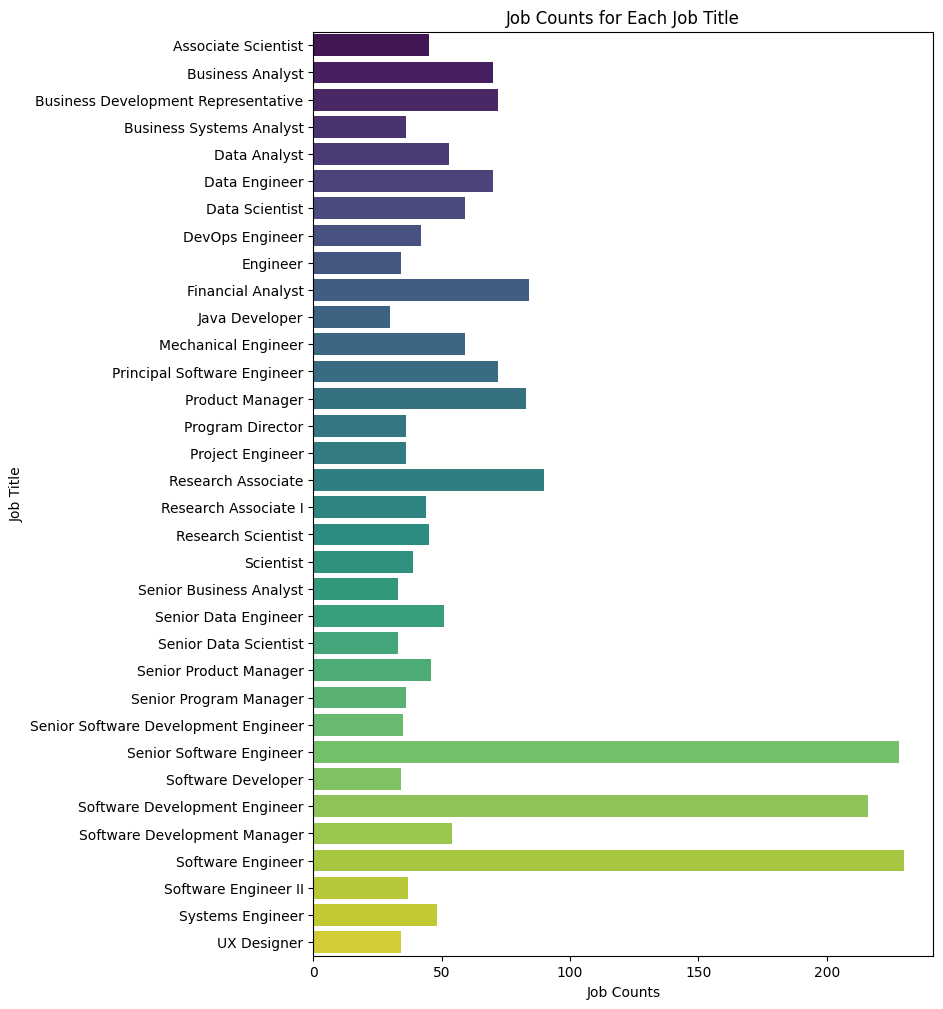

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,12))
sns.barplot(x='Job_Counts', y='Job Title', data=grouped_data, palette='viridis')
plt.title('Job Counts for Each Job Title')
plt.xlabel('Job Counts')
plt.ylabel('Job Title')
plt.show()

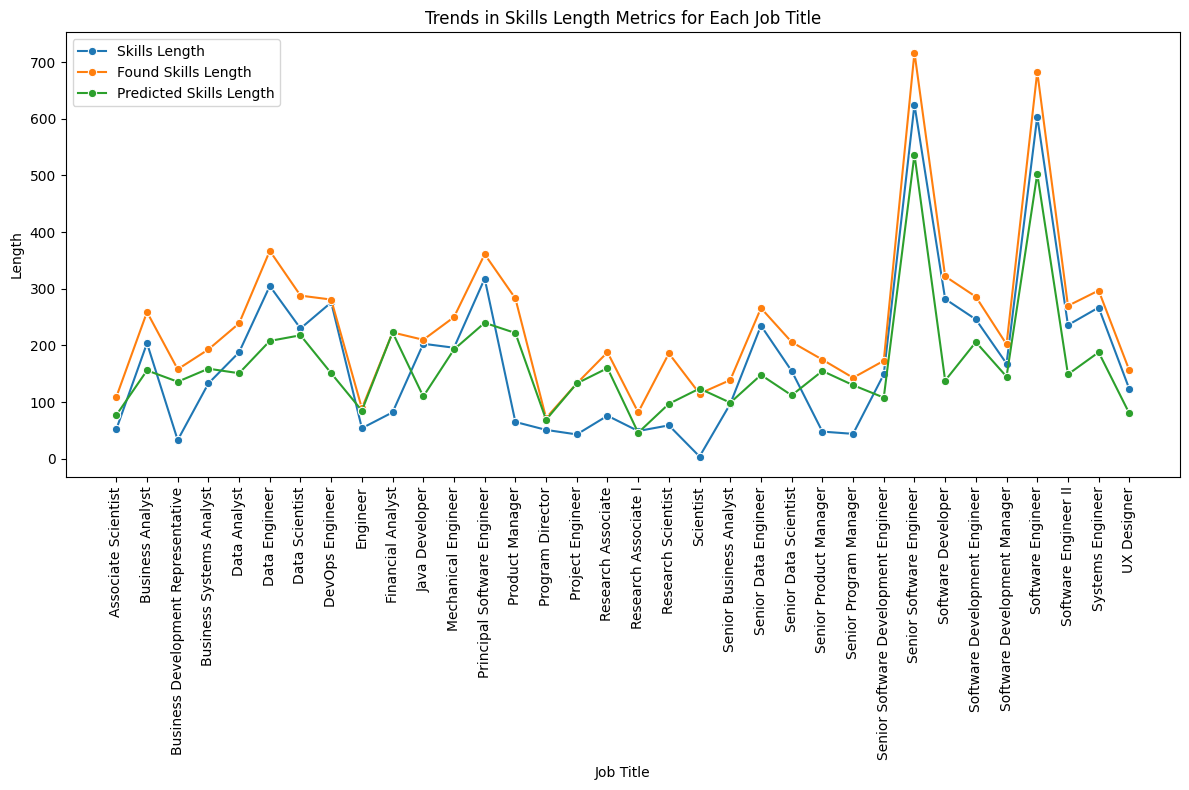

In [ ]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=grouped_data, x='Job Title', y='Skills Length', marker='o', label='Skills Length')
sns.lineplot(data=grouped_data, x='Job Title', y='Found Skills Length', marker='o', label='Found Skills Length')
sns.lineplot(data=grouped_data, x='Job Title', y='Predicted Skills Length', marker='o', label='Predicted Skills Length')

plt.xticks(rotation=45)
plt.title('Trends in Skills Length Metrics for Each Job Title')
plt.ylabel('Length')
plt.xlabel('Job Title')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

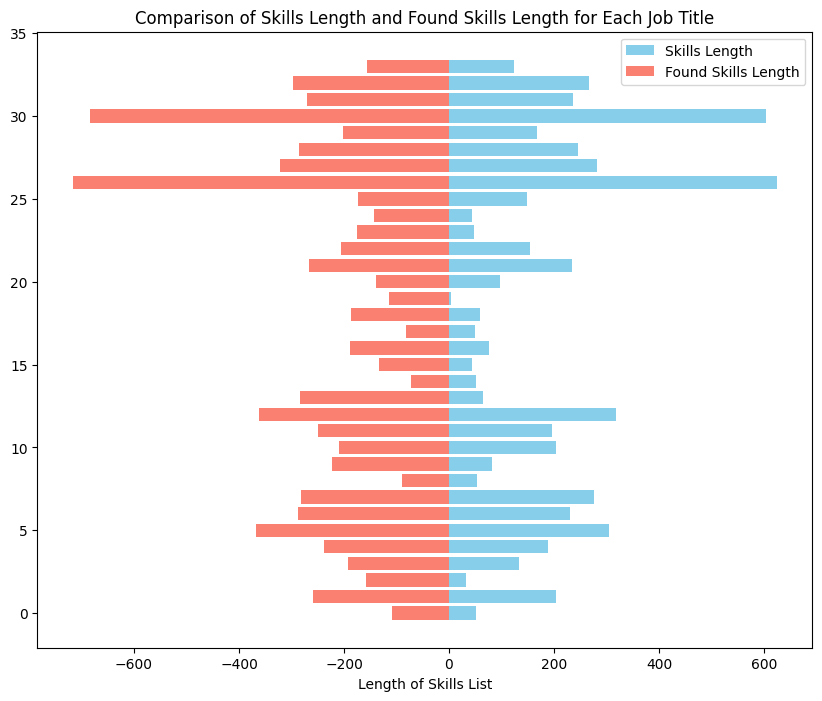

In [ ]:
import matplotlib.pyplot as plt


# Preparing data for the bidirectional bar chart
job_titles = grouped_data.index
skills_length = grouped_data['Skills Length']
found_skills_length = grouped_data['Found Skills Length']

# Creating the bidirectional bar chart
fig, ax = plt.subplots(figsize=(10, 8))

ax.barh(job_titles, skills_length, color='skyblue', label='Skills Length')
ax.barh(job_titles, -found_skills_length, color='salmon', label='Found Skills Length')

ax.set_xlabel('Length of Skills List')
ax.set_title('Comparison of Skills Length and Found Skills Length for Each Job Title')
ax.legend()
plt.show()



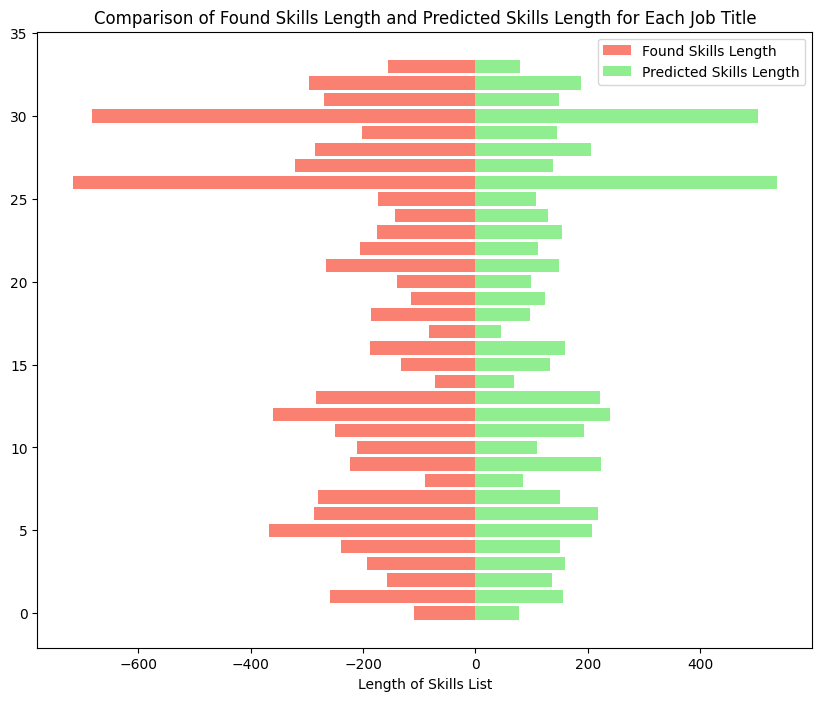

In [ ]:
predicted_skills_length = grouped_data['Predicted Skills Length']

# Creating the bidirectional bar chart
fig, ax = plt.subplots(figsize=(10, 8))

ax.barh(job_titles, -found_skills_length, color='salmon', label='Found Skills Length')
ax.barh(job_titles, predicted_skills_length, color='lightgreen', label='Predicted Skills Length')

ax.set_xlabel('Length of Skills List')
ax.set_title('Comparison of Found Skills Length and Predicted Skills Length for Each Job Title')
ax.legend()
plt.show()

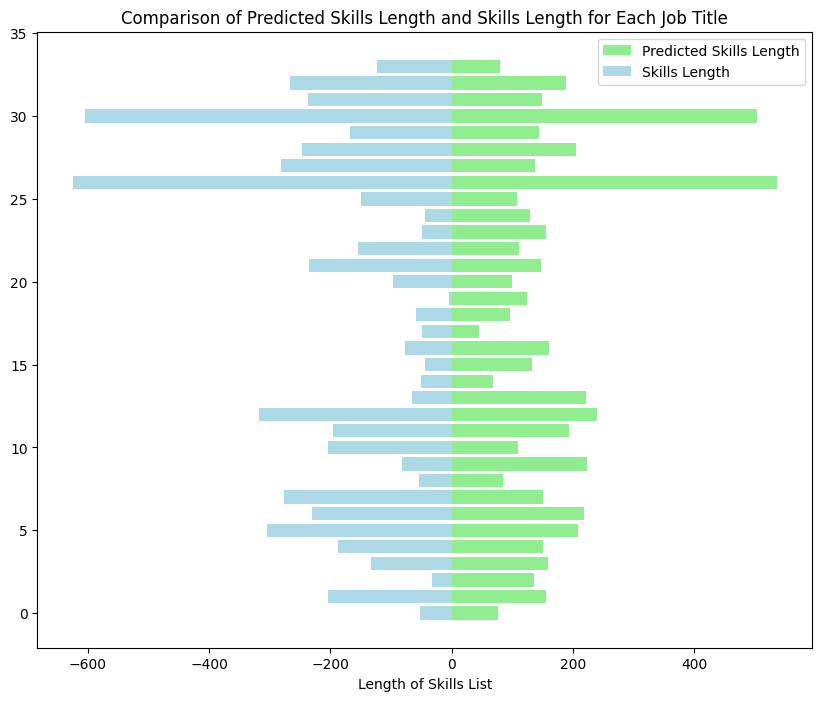

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))

ax.barh(job_titles, predicted_skills_length, color='lightgreen', label='Predicted Skills Length')
ax.barh(job_titles, -skills_length, color='lightblue', label='Skills Length')

ax.set_xlabel('Length of Skills List')
ax.set_title('Comparison of Predicted Skills Length and Skills Length for Each Job Title')
ax.legend()
plt.show()

In [ ]:
grouped_data[grouped_data["Predicted Skills Length"] > grouped_data["Found Skills Length"]]

,Job Title,Skills,found_skills,Predicted Skills,Job_Counts,Skills Length,Found Skills Length,Predicted Skills Length
19,Scientist,"{Flux Analysis, Complex Analysis, Interpretati...","{bioreactor, scientists, calibration, insuranc...","{bioreactor, scientists, assay, bsc, paycheck,...",39,4,115,124


In [ ]:
grouped_data[grouped_data["Predicted Skills Length"] > grouped_data["Found Skills Length"]]

,Job Title,Skills,found_skills,Predicted Skills,Job_Counts,Skills Length,Found Skills Length,Predicted Skills Length
19,Scientist,"{Flux Analysis, Complex Analysis, Interpretati...","{bioreactor, scientists, calibration, insuranc...","{bioreactor, scientists, assay, bsc, paycheck,...",39,4,115,124


In [ ]:
grouped_data.to_parquet("sorted_by_jobs.parquet")

# Not Predicted Skills and New Predicted Skills

In [31]:
def find_unique_pred_skills(row):
    # [skill for skill in row['Predicted Skills'] if skill not in list(row['Skills']) + list(row['found_skills'])]
    return [skill for skill in row['Predicted Skills'] if len(skill) > 0]

def find_unpred_skills(row):
    combined_skills = list(row['Skills']) + list(row['found_skills'])
    return [skill for skill in combined_skills if skill not in row['Predicted Skills']]

In [32]:
final_merged_df['unique_pred_skills'] = final_merged_df.apply(find_unique_pred_skills, axis=1)
final_merged_df['unpred_skills'] = final_merged_df.apply(find_unpred_skills, axis=1)

final_merged_df[['unique_pred_skills', 'unpred_skills']]

,unique_pred_skills,unpred_skills
0,"[data integration, software development life c...","[Java, Application Architecture, CI, Data Stru..."
1,"[curiosity, advisor, application development, ...","[Advisor, facebook, twitter, linkedin, youtube..."
2,"[schneider, software services, intercom, insta...","[microsoft word, http, https, excel]"
3,"[linear regression, logistic regression, scien...","[Data Engineering, Schema Design, Informatica,..."
4,"[product management, product management, desig...","[Product Requirements, Product Management, Pro..."
...,...,...
2209,"[zoom, business education, data science, produ...","[Data Management, Data Warehouse, HTTP, Stata,..."
2210,"[technology solutions, agile, agile, critical ...","[Information Systems, HTTP, BI Publisher, SQL,..."
2211,[],"[Unix, Query Optimization, Java, Methodologies..."
2212,[project],"[Financial Analysis, Accounting, Budget Analys..."


In [33]:
more_unique_pred_skills = (final_merged_df['unique_pred_skills'].apply(len) > final_merged_df['unpred_skills'].apply(len)).sum()
more_unpred_skills = (final_merged_df['unpred_skills'].apply(len) > final_merged_df['unique_pred_skills'].apply(len)).sum()

more_unique_pred_skills, more_unpred_skills

(319, 1854)

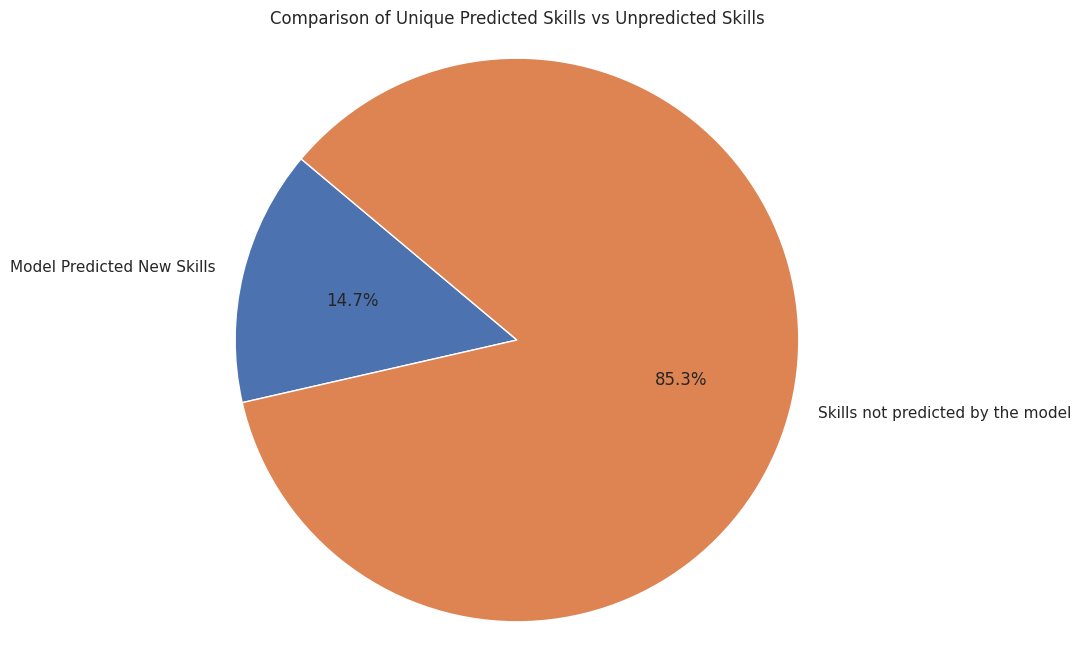

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data for the pie chart
labels = 'Model Predicted New Skills', 'Skills not predicted by the model'
sizes = [more_unique_pred_skills, more_unpred_skills]

# Setting the "Good Seaborn" (Good SSN) theme for the plot
sns.set_theme(style="whitegrid")

# Creating the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Comparison of Unique Predicted Skills vs Unpredicted Skills')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

In [36]:
(1854/2214)*100

83.73983739837398